In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from helpers.dataset_new import *
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.dpi'] = 100
import json
from helpers.dataset import dataset_experiments, compute_spectrum, compute_cospectrum
from IPython.display import Video

# Compute statistics

In [86]:
DNS = ['/scratch/pp2681/mom6/Feb2022/bare/R4/output/', '/scratch/pp2681/mom6/Feb2022/bare/R8/output/', '/scratch/pp2681/mom6/Feb2022/bare/R16/output/', '/scratch/pp2681/mom6/Feb2022/bare/R32/output/', '/scratch/pp2681/mom6/Feb2022/bare/R64/output/']
compute_statistics(DNS, coarsegraining=['R4','R8', 'R16', 'R32'])

/scratch/pp2681/mom6/Feb2022/bare/R4/output/statistics.nc
/scratch/pp2681/mom6/Feb2022/bare/R8/output/statistics.nc
/scratch/pp2681/mom6/Feb2022/bare/R8/output/statistics_R4.nc
/scratch/pp2681/mom6/Feb2022/bare/R16/output/statistics.nc
/scratch/pp2681/mom6/Feb2022/bare/R16/output/statistics_R4.nc
/scratch/pp2681/mom6/Feb2022/bare/R16/output/statistics_R8.nc
/scratch/pp2681/mom6/Feb2022/bare/R32/output/statistics.nc
/scratch/pp2681/mom6/Feb2022/bare/R32/output/statistics_R4.nc
/scratch/pp2681/mom6/Feb2022/bare/R32/output/statistics_R8.nc
/scratch/pp2681/mom6/Feb2022/bare/R32/output/statistics_R16.nc
/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics.nc
/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics_R4.nc
/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics_R8.nc
/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics_R16.nc
/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics_R32.nc


In [98]:
R4_folders = ['/scratch/pp2681/mom6/Apr2022/R4/EXP'+str(i)+'/output' for i in range(1,211)]
compute_statistics(R4_folders)

/scratch/pp2681/mom6/Apr2022/R4/EXP1/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP2/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP3/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP4/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP5/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP6/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP7/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP8/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP9/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP10/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP11/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP12/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP13/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP14/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP15/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP16/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP17/output/statistics.nc
/scrat

/scratch/pp2681/mom6/Apr2022/R4/EXP140/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP141/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP142/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP143/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP144/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP145/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP146/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP147/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP148/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP149/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP150/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP151/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP152/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP153/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP154/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP155/output/statistics.nc
/scratch/pp2681/mom6/Apr2022/R4/EXP156/o

# Read DNS and coarse models into common file with additional dimension "EXP"

In [2]:
ds = xr.open_dataset('/scratch/pp2681/mom6/Feb2022/bare/R64/output/statistics_R4.nc')
param = {}
for exp in ['EXP'+str(i) for i in range(1,211)]:
    folder = '/scratch/pp2681/mom6/Apr2022/R4/'+exp
    stat = folder+'/output/statistics.nc'
    ds = xr.concat([ds, xr.open_dataset(stat)], dim='EXP')
    with open(folder+'/args.json', 'r') as f:
        param[exp] = json.load(f)

In [3]:
ds['ssh_mean_error'] = ds.ssh_mean - ds.ssh_mean.isel(EXP=0)
ds['ssh_var_error'] = ds.ssh_var - ds.ssh_var.isel(EXP=0)
ds['ssh_mean_L1'] = abs(ds.ssh_mean_error).mean(dim=("xh","yh"))
ds['ssh_mean_L2'] = np.sqrt((ds.ssh_mean_error**2).mean(dim=("xh","yh")))
ds['ssh_var_L1'] = abs(ds.ssh_var_error).mean(dim=("xh","yh"))
ds['ssh_var_L2'] = np.sqrt((ds.ssh_var_error**2).mean(dim=("xh","yh")))

In [8]:
C_S = np.zeros(211)
amp = np.zeros(211)
for key in param.keys():
    EXP = int(key[3:])
    C_S[EXP] = param[key]['SMAG_BI_CONST']
    if param[key]['USE_ZB2020']=='True':
        amp[EXP] = param[key]['amplitude']
amp[1:11] = 0.

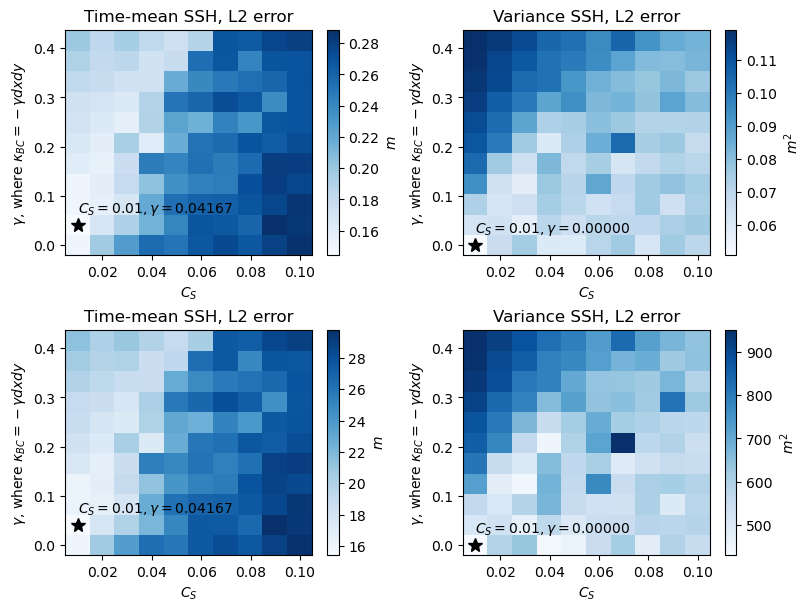

In [90]:
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(8,6))
X,Y,Z = plot_error_pcolor(fig,axs[0][0], ds, 'ssh_mean_L2', 0, C_S, amp, cmap_label = '$m$', title='Time-mean SSH, L2 error')
X,Y,Z = plot_error_pcolor(fig,axs[0][1], ds, 'ssh_var_L2', 0, C_S, amp, cmap_label = '$m^2$', title='Variance SSH, L2 error')
X,Y,Z = plot_error_pcolor(fig,axs[1][0], ds, 'ssh_mean_L2', 1, C_S, amp, cmap_label = '$m$', title='Time-mean SSH, L2 error')
X,Y,Z = plot_error_pcolor(fig,axs[1][1], ds, 'ssh_var_L2', 1, C_S, amp, cmap_label = '$m^2$', title='Variance SSH, L2 error')

In [155]:
ar1 = np.argsort(ds.ssh_mean_L2.isel(zi=0)).values[1:10]
ar2 = np.argsort(ds.ssh_var_L2.isel(zi=0)).values[1:10]
ar3 = np.argsort(ds.ssh_mean_L2.isel(zi=1)).values[1:10]
ar4 = np.argsort(ds.ssh_var_L2.isel(zi=1)).values[1:10]
print(ar1)
print(ar2)
print(ar3)
print(ar4)
print(np.intersect1d(ar1,ar2))
print(np.intersect1d(ar3,ar4))

[205 169 166 159 186 196 170 154 112]
[  1 186 146 196 201 128  31 193  33]
[205 169 166 186 159 196 170 157 154]
[  1 146 135   4  33 128 186  45   5]
[186 196]
[186]


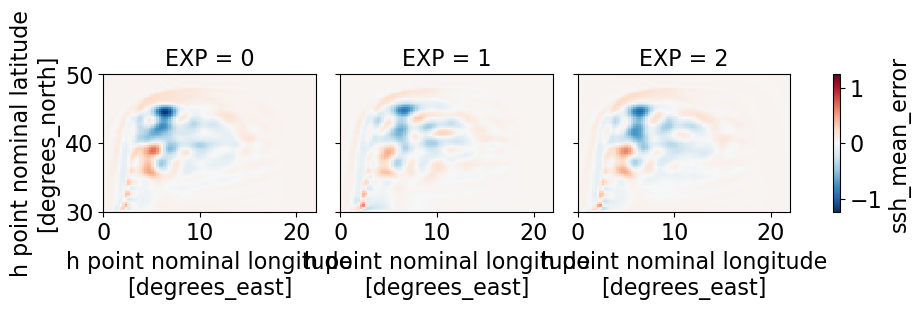

In [194]:
ds.ssh_mean_error.isel(zi=0,EXP=[11,205,186]).plot(col='EXP')

In [133]:
from functools import reduce
reduce(np.intersect1d, (ar1,ar2,ar3,ar4))

array([  1, 138, 166, 186, 193, 196, 203])

# Spectra for best experiments

In [158]:
common_folder = '/scratch/pp2681/mom6'

In [183]:
exps = ['Apr2022/R4/EXP'+str(i) for i in range(1,211)]
exps.append('Feb2022/bare/R32')
#print(exps)

In [184]:
DS =  dataset_experiments(common_folder, exps)

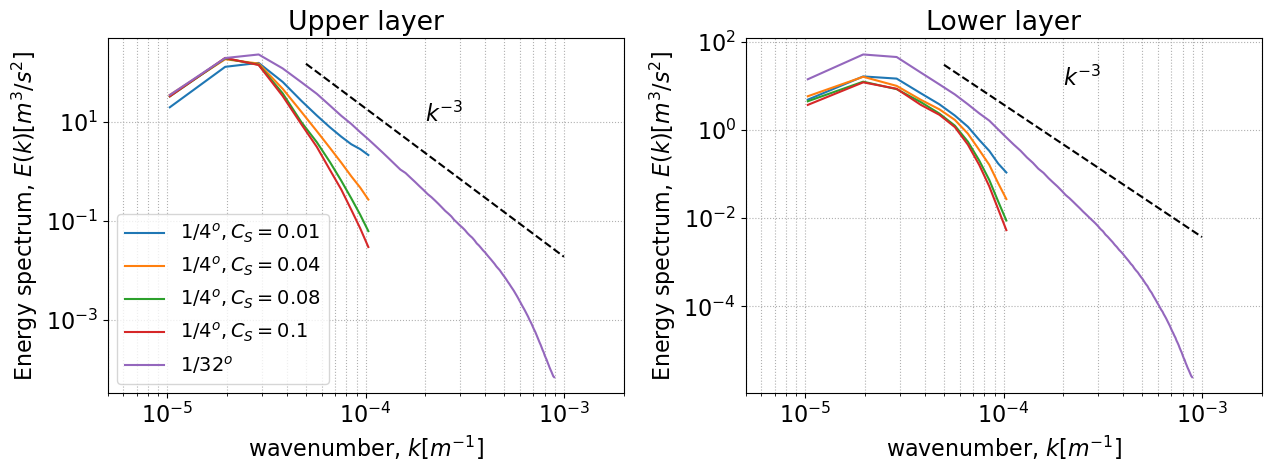

In [189]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP1', 'Apr2022/R4/EXP4', 'Apr2022/R4/EXP8', 'Apr2022/R4/EXP10', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.01$', '$1/4^o, C_S=0.04$', '$1/4^o, C_S=0.08$', '$1/4^o, C_S=0.1$', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)

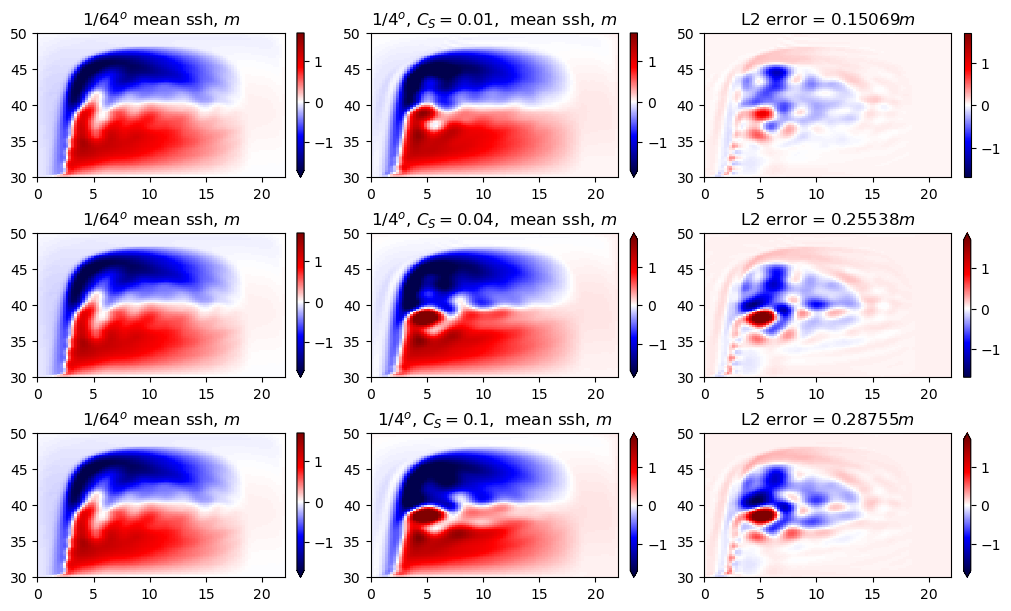

In [244]:
matplotlib.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(3,3, constrained_layout=True, figsize=(10,6))

row = 0
for exp in [1, 4, 10]:
    ax = axs[row,0]
    ds.ssh_mean.isel(zi=0,EXP=0).plot(ax=ax, vmin=-1.7, vmax=1.7, cmap=cm.seismic, cbar_kwargs={'label': ''})
    ax.set_title('$1/64^o$ mean ssh, $m$')
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax = axs[row,1]
    ds.ssh_mean.isel(zi=0,EXP=exp).plot(ax=ax, vmin=-1.7, vmax=1.7, cmap=cm.seismic, cbar_kwargs={'label': ''})
    ax.set_title(f'$1/4^o$, $C_S={exp/100}$,  mean ssh, $m$')
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax = axs[row,2]
    ds.ssh_mean_error.isel(zi=0,EXP=exp).plot(ax=ax, vmin=-1.7, vmax=1.7, cmap=cm.seismic, cbar_kwargs={'label': ''})
    error = float(ds.ssh_mean_L2.isel(zi=0,EXP=exp))
    ax.set_title(f'L2 error = ${error:.5f}  m$')
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    row += 1
fig.savefig('SSH_Smag.png', dpi=150)

Text(0.5, 0.98, '$C_S=0.01$')

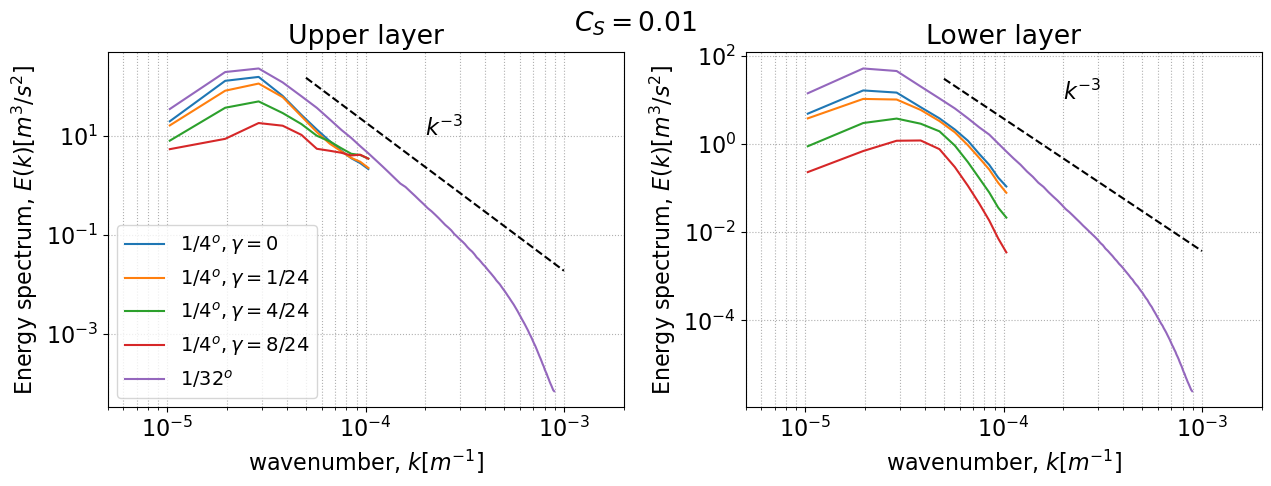

In [253]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP1', 'Apr2022/R4/EXP11', 'Apr2022/R4/EXP14', 'Apr2022/R4/EXP18', 'Feb2022/bare/R32'],
names = ('$1/4^o, \gamma=0$', '$1/4^o, \gamma=1/24$', '$1/4^o, \gamma=4/24$', '$1/4^o, \gamma=8/24$', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.suptitle('$C_S=0.01$')

Text(0.5, 0.98, '$C_S=0.04$')

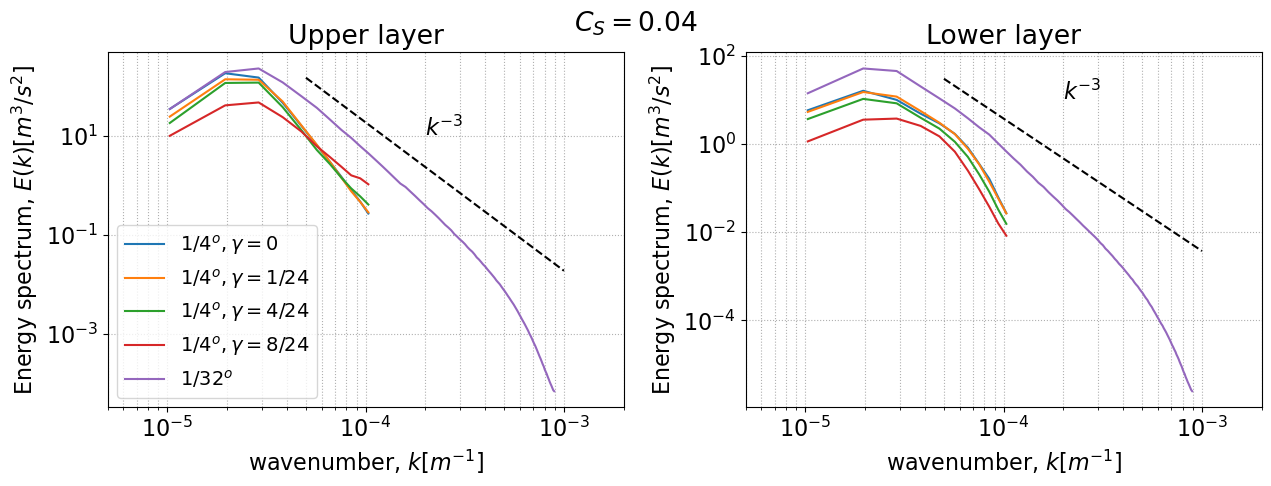

In [254]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP4', 'Apr2022/R4/EXP41', 'Apr2022/R4/EXP44', 'Apr2022/R4/EXP48', 'Feb2022/bare/R32'],
names = ('$1/4^o, \gamma=0$', '$1/4^o, \gamma=1/24$', '$1/4^o, \gamma=4/24$', '$1/4^o, \gamma=8/24$', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.suptitle('$C_S=0.04$')

Text(0.5, 0.98, '$C_S=0.1$')

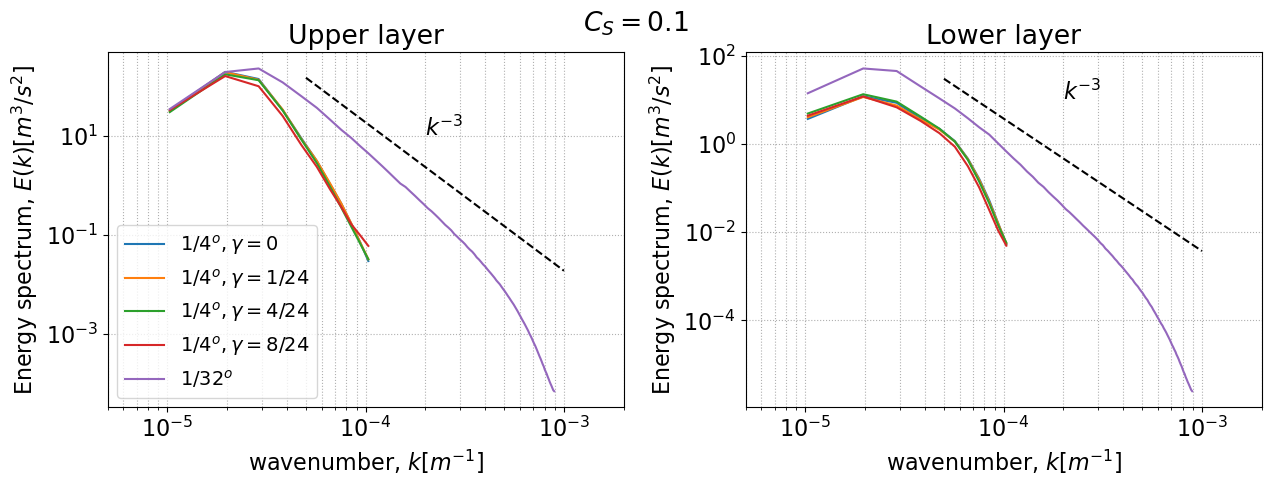

In [255]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP10', 'Apr2022/R4/EXP101', 'Apr2022/R4/EXP104', 'Apr2022/R4/EXP108', 'Feb2022/bare/R32'],
names = ('$1/4^o, \gamma=0$', '$1/4^o, \gamma=1/24$', '$1/4^o, \gamma=4/24$', '$1/4^o, \gamma=8/24$', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.suptitle('$C_S=0.1$')

Text(0.5, 0.98, '$C_S=0.1, \\gamma=8/24$')

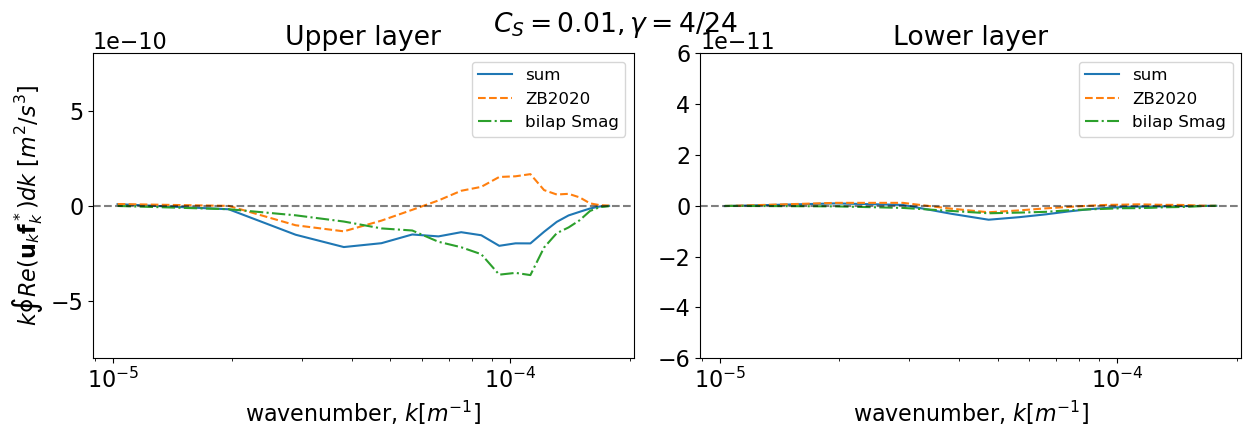

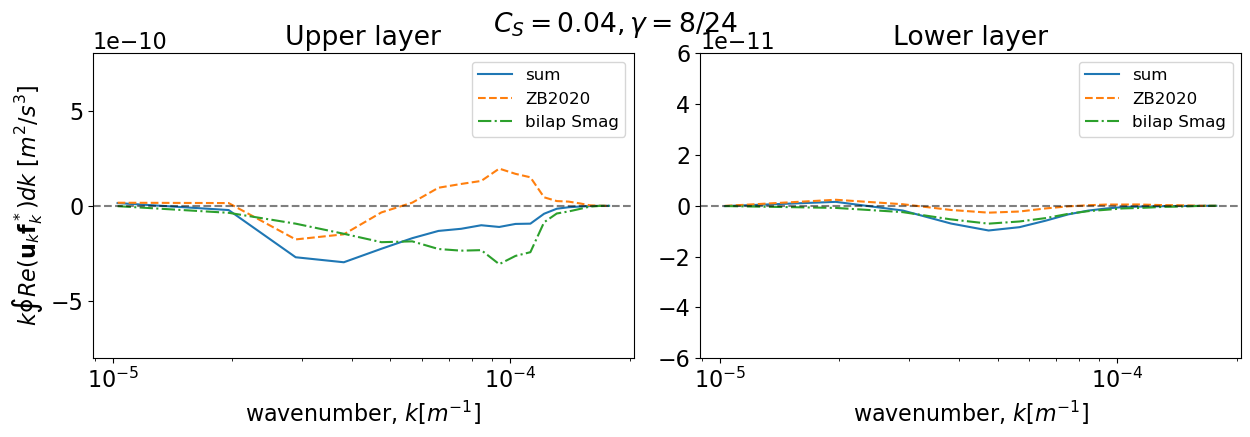

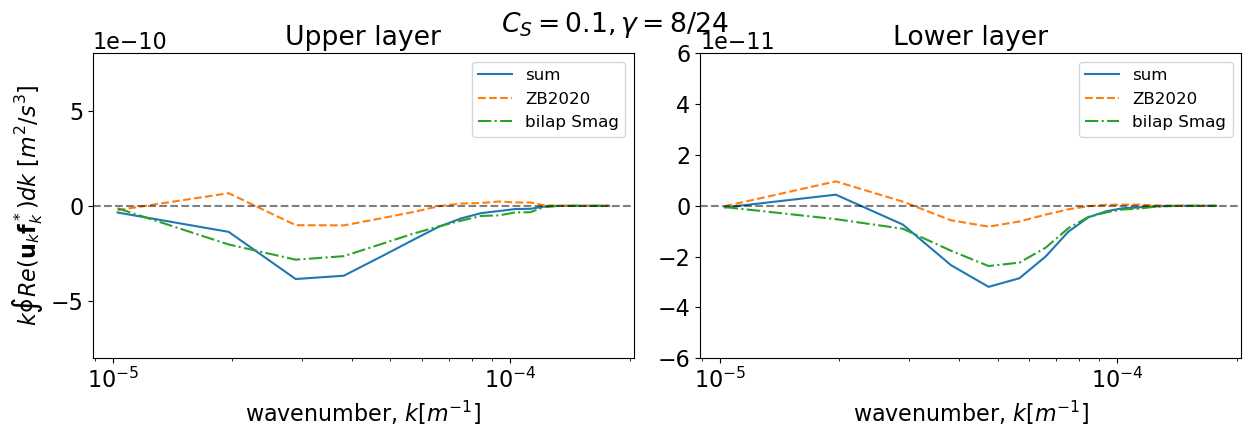

In [287]:
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP14'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.suptitle('$C_S=0.01, \gamma=4/24$')

DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP48'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.suptitle('$C_S=0.04, \gamma=8/24$')

DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP108'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.suptitle('$C_S=0.1, \gamma=8/24$')

Text(0.5, 1, '$C_S=0.03, \\gamma=8/24$')

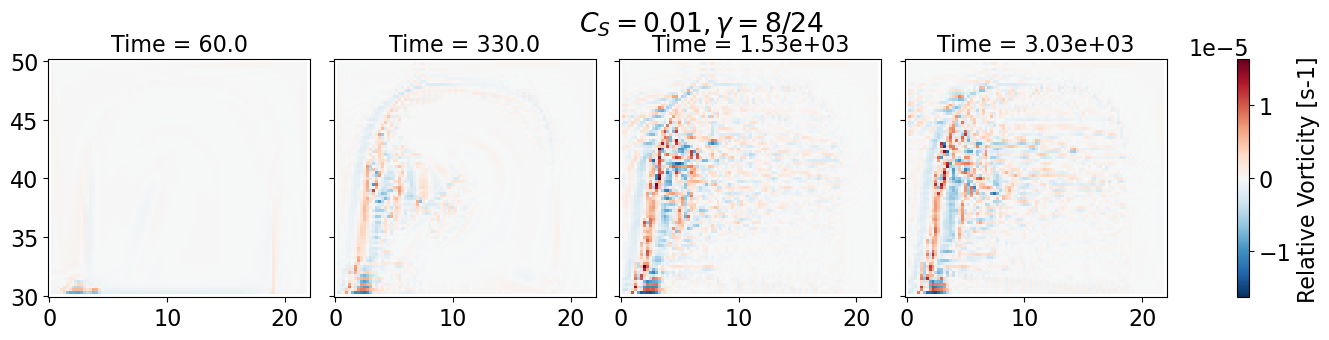

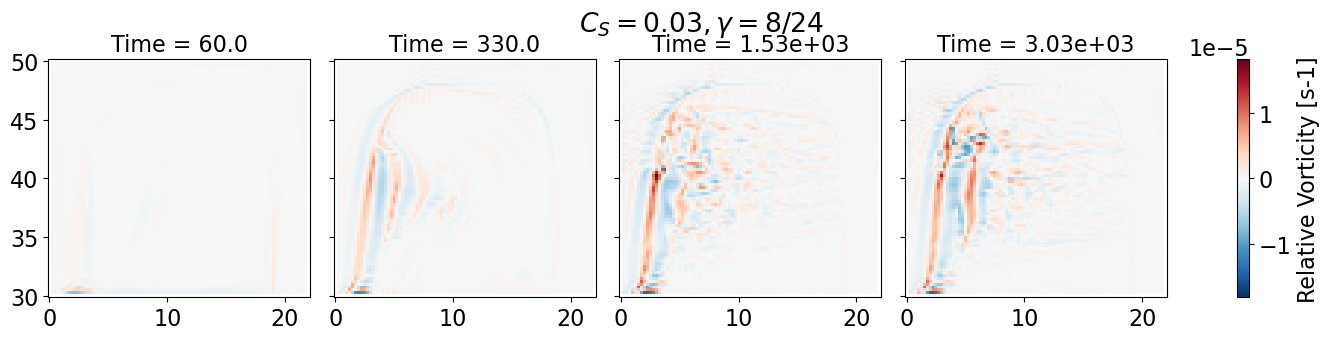

In [325]:
out = DS['Apr2022/R4/EXP18'].prog.RV.isel(zl=0,Time=[1,10,50,100]).plot(col='Time', size=4, aspect=0.9)
axs = out.axes
for i in range(axs.shape[1]):
    for j in range(axs.shape[0]):
        axs[j][i].set_xlabel('')
        axs[j][i].set_ylabel('')
plt.suptitle('$C_S=0.01, \gamma=8/24$', y=1)

out = DS['Apr2022/R4/EXP38'].prog.RV.isel(zl=0,Time=[1,10,50,100]).plot(col='Time', size=4, aspect=0.9)
axs = out.axes
for i in range(axs.shape[1]):
    for j in range(axs.shape[0]):
        axs[j][i].set_xlabel('')
        axs[j][i].set_ylabel('')
plt.suptitle('$C_S=0.03, \gamma=8/24$', y=1)

In [305]:
lox.axes[0][0]

<AxesSubplot:title={'center':'Time = 60.0'}, xlabel='q point nominal longitude\n[degrees_east]', ylabel='q point nominal latitude\n[degrees_north]'>

# Best ADM/Reynolds-like models

In [334]:
print(ds.ssh_mean_L2.isel(zi=0,EXP=112))
param['EXP112']

<xarray.DataArray 'ssh_mean_L2' ()>
array(0.13747461, dtype=float32)
Coordinates:
    zi       float64 1.034e+03


{'resolution': 'R4',
 'DAYMAX': 7300.0,
 'RESTINT': 1825.0,
 'LAPLACIAN': 'False',
 'BIHARMONIC': 'True',
 'SMAGORINSKY_AH': True,
 'SMAG_BI_CONST': 0.01,
 'USE_ZB2020': 'True',
 'amplitude': 0.125,
 'ZB_type': 0,
 'ZB_cons': 1,
 'LPF_iter': 2,
 'LPF_order': 4,
 'HPF_iter': 0,
 'HPF_order': 1,
 'Stress_iter': 0,
 'Stress_order': 1}

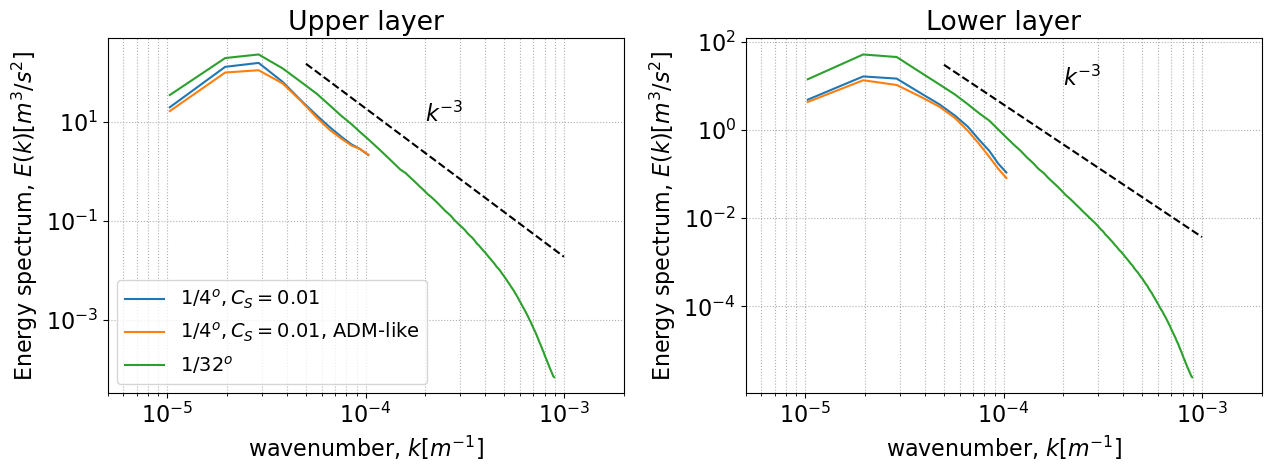

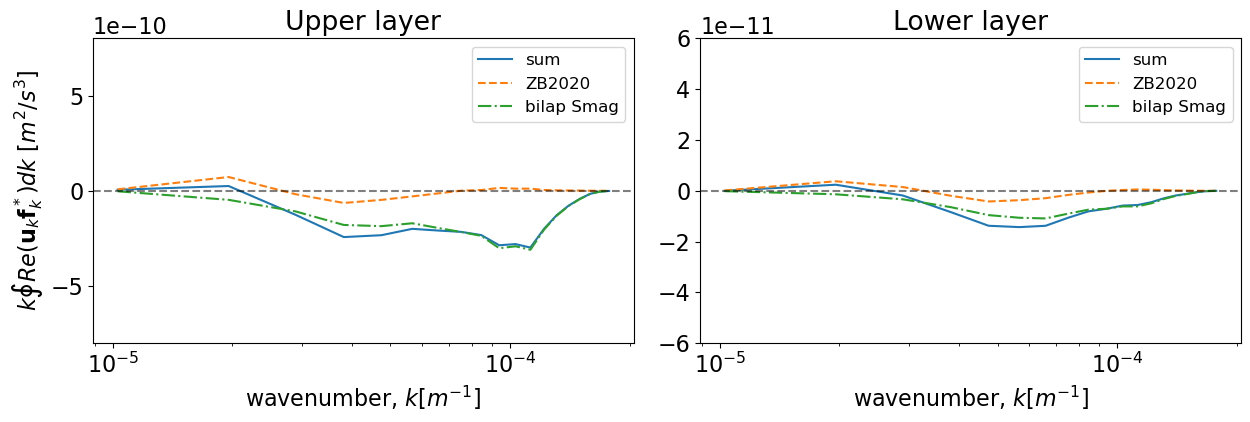

In [337]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP1', 'Apr2022/R4/EXP112', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.01$', '$1/4^o, C_S=0.01$, ADM-like', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP112'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)

In [350]:
ds.ssh_mean_L2.isel(zi=0,EXP=145)
param['EXP145']

{'resolution': 'R4',
 'DAYMAX': 7300.0,
 'RESTINT': 1825.0,
 'LAPLACIAN': 'False',
 'BIHARMONIC': 'True',
 'SMAGORINSKY_AH': True,
 'SMAG_BI_CONST': 0.04,
 'USE_ZB2020': 'True',
 'amplitude': 1.0,
 'ZB_type': 0,
 'ZB_cons': 1,
 'LPF_iter': 4,
 'LPF_order': 4,
 'HPF_iter': 0,
 'HPF_order': 1,
 'Stress_iter': 2,
 'Stress_order': 2}

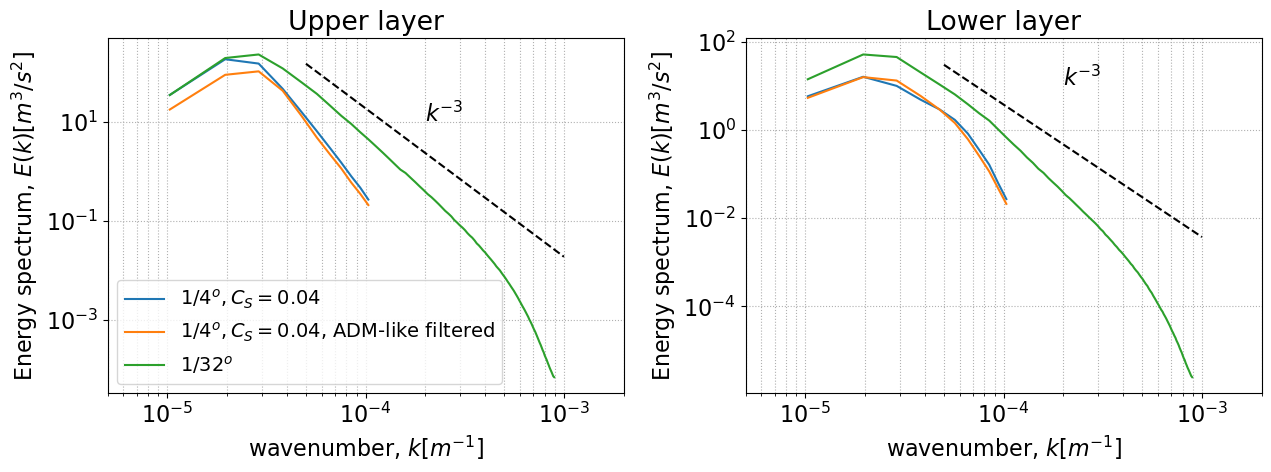

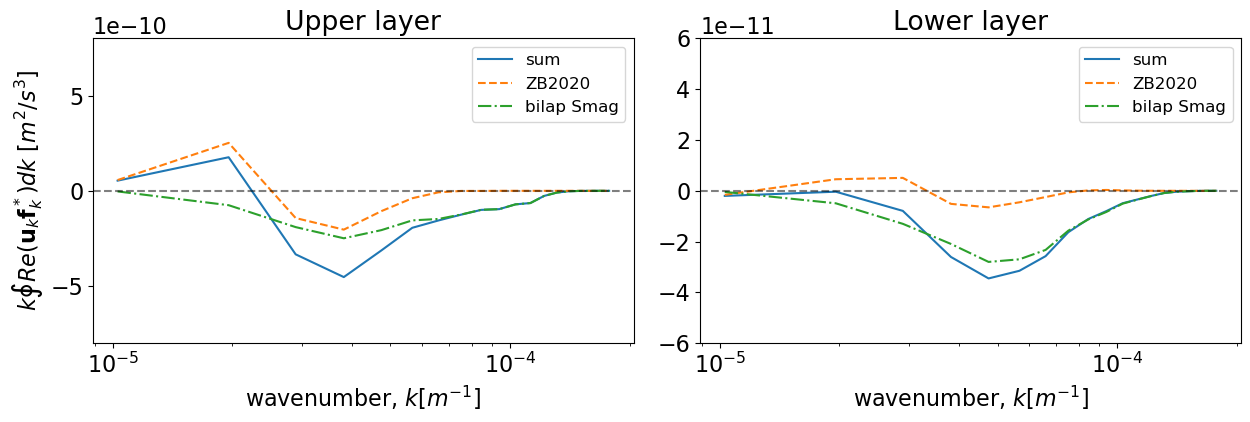

In [359]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP4', 'Apr2022/R4/EXP145', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.04$', '$1/4^o, C_S=0.04$, ADM-like filtered', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP145'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)

In [356]:
ds.ssh_mean_L2.isel(zi=0,EXP=169)
param['EXP169']

{'resolution': 'R4',
 'DAYMAX': 7300.0,
 'RESTINT': 1825.0,
 'LAPLACIAN': 'False',
 'BIHARMONIC': 'True',
 'SMAGORINSKY_AH': True,
 'SMAG_BI_CONST': 0.02,
 'USE_ZB2020': 'True',
 'amplitude': 0.2916666666666667,
 'ZB_type': 0,
 'ZB_cons': 1,
 'LPF_iter': 0,
 'LPF_order': 1,
 'HPF_iter': 0,
 'HPF_order': 1,
 'Stress_iter': 3,
 'Stress_order': 2}

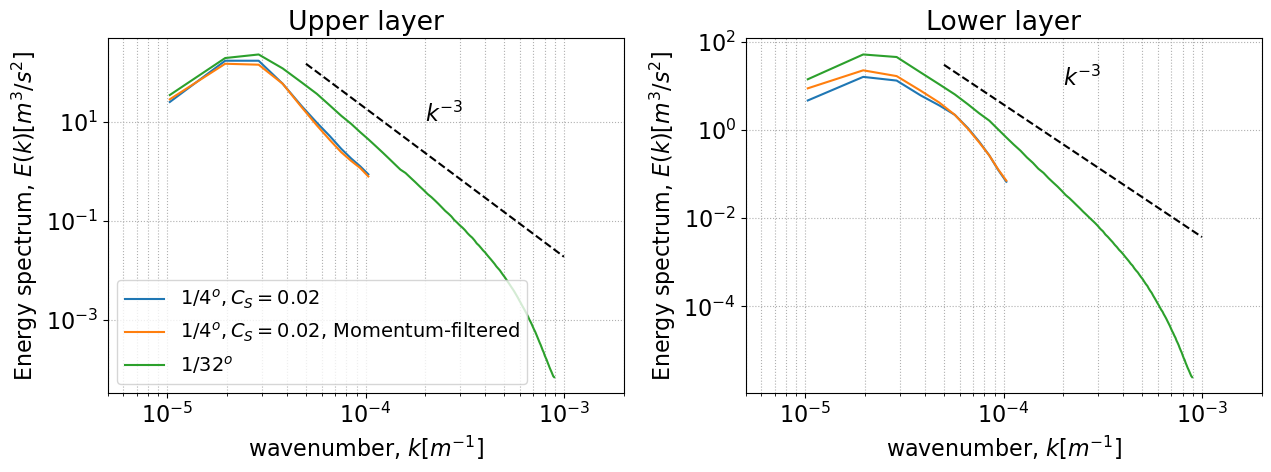

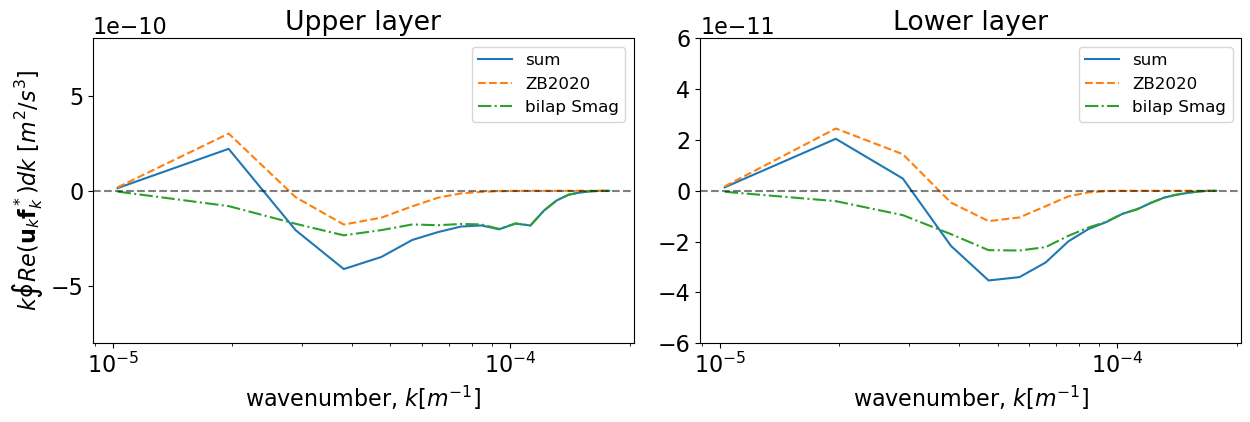

In [361]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP2', 'Apr2022/R4/EXP169', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.02$', '$1/4^o, C_S=0.02$, Momentum-filtered', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP169'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)

In [367]:
ds.ssh_mean_L2.isel(zi=0,EXP=186)
param['EXP186']

{'resolution': 'R4',
 'DAYMAX': 7300.0,
 'RESTINT': 1825.0,
 'LAPLACIAN': 'False',
 'BIHARMONIC': 'True',
 'SMAGORINSKY_AH': True,
 'SMAG_BI_CONST': 0.01,
 'USE_ZB2020': 'True',
 'amplitude': 4.0,
 'ZB_type': 0,
 'ZB_cons': 1,
 'LPF_iter': 2,
 'LPF_order': 3,
 'HPF_iter': 3,
 'HPF_order': 2,
 'Stress_iter': 0,
 'Stress_order': 1}

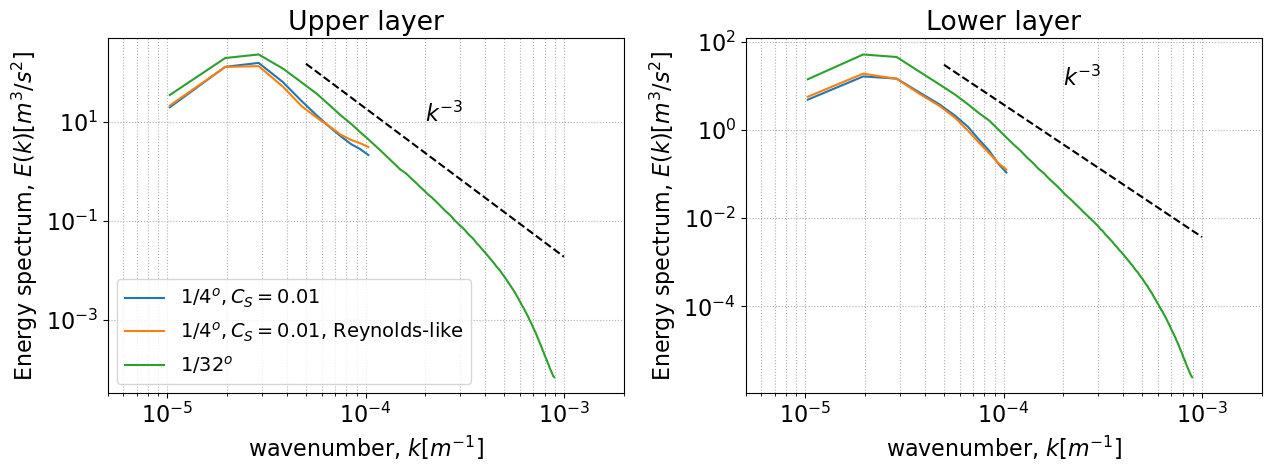

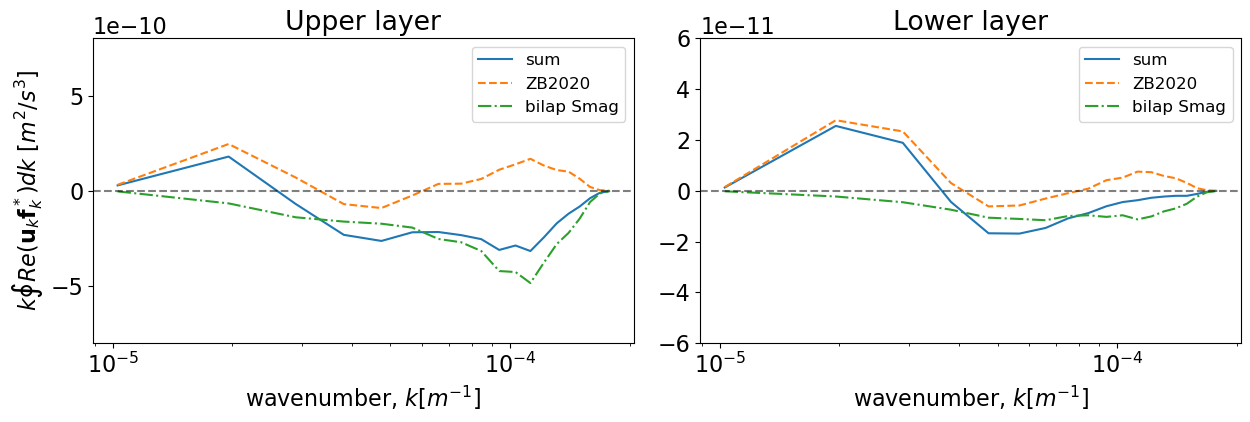

In [368]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP1', 'Apr2022/R4/EXP186', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.01$', '$1/4^o, C_S=0.01$, Reynolds-like', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP186'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', ylim1=(-8e-10, 8e-10), ylim2=(-6e-11, 6e-11), averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)

In [376]:
ds.ssh_mean_L2.isel(zi=0,EXP=205)
param['EXP205']

{'resolution': 'R4',
 'DAYMAX': 7300.0,
 'RESTINT': 1825.0,
 'LAPLACIAN': 'False',
 'BIHARMONIC': 'True',
 'SMAGORINSKY_AH': True,
 'SMAG_BI_CONST': 0.03,
 'USE_ZB2020': 'True',
 'amplitude': 7.0,
 'ZB_type': 0,
 'ZB_cons': 1,
 'LPF_iter': 1,
 'LPF_order': 4,
 'HPF_iter': 2,
 'HPF_order': 2,
 'Stress_iter': 1,
 'Stress_order': 2}

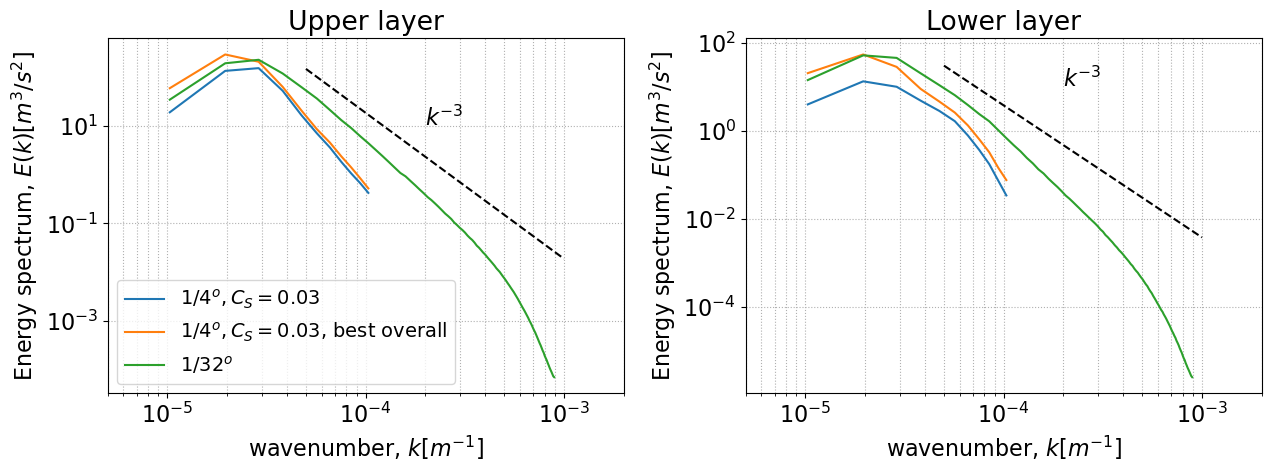

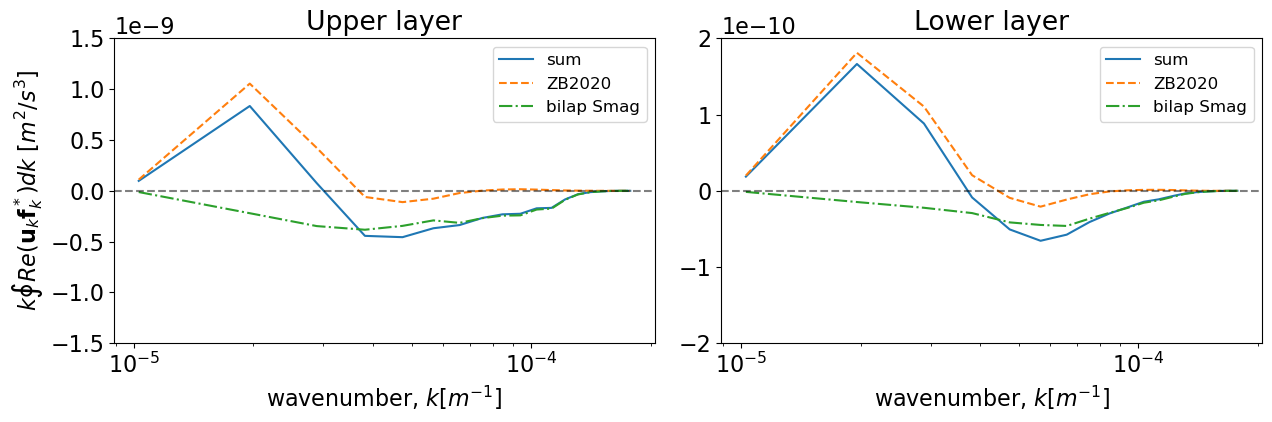

In [378]:
DS.plot_KE_spectrum(['Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'],
names = ('$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall', '$1/32^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
DS.plot_cospectrum_componentwise(['Apr2022/R4/EXP205'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)

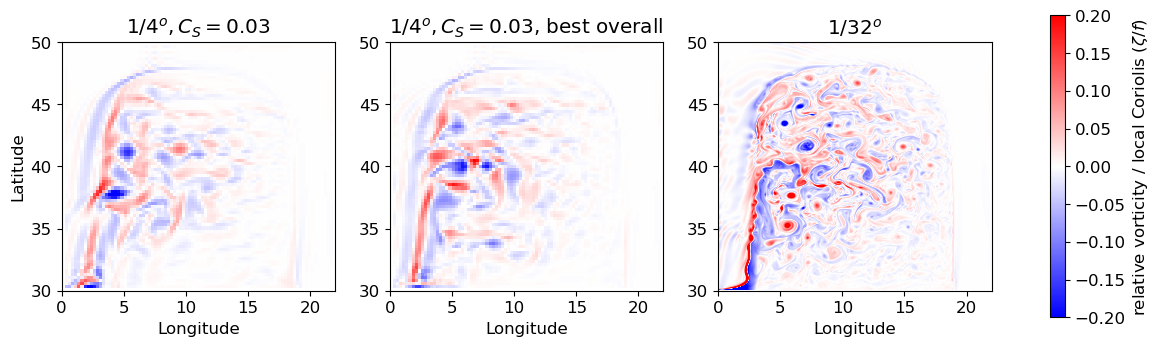

In [380]:
DS.plot_relative_vorticity_snapshot(('Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'), 
                                    names=['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall','$1/32^o$'])

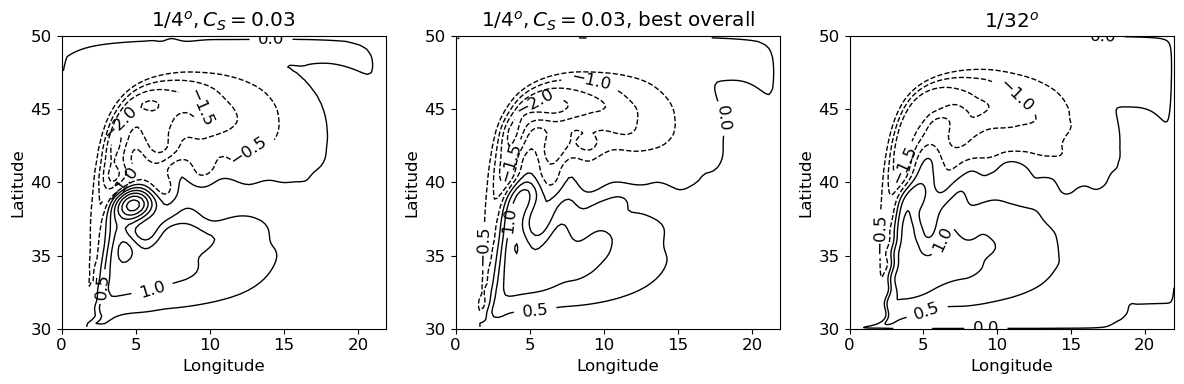

In [382]:
DS.plot_ssh(('Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'), 
                                    names=['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall','$1/32^o$'])

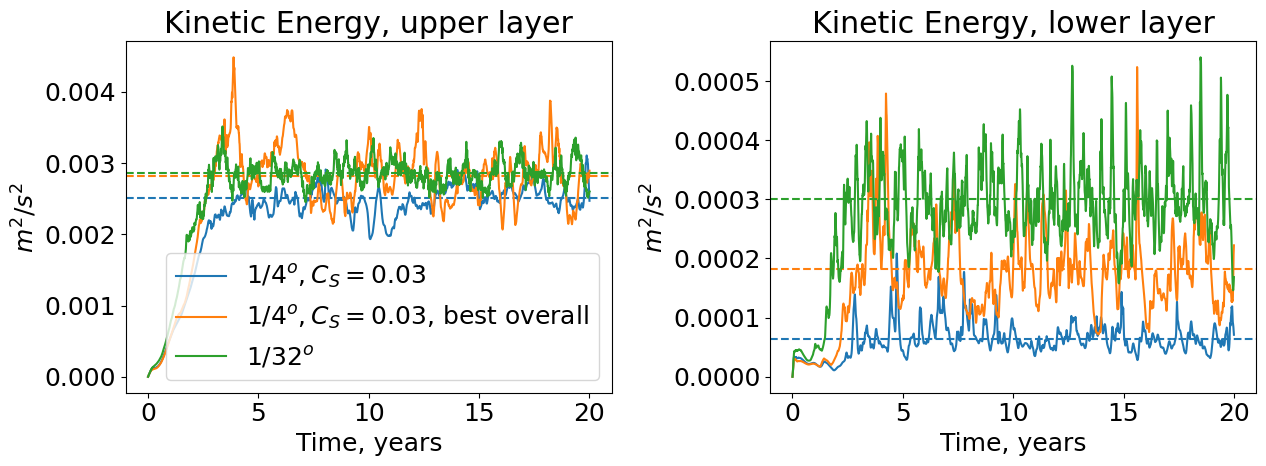

In [385]:
DS.plot_KE(('Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'), 
                                    names=['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall','$1/32^o$'])

Text(0.5, 0.98, 'Lower Layer')

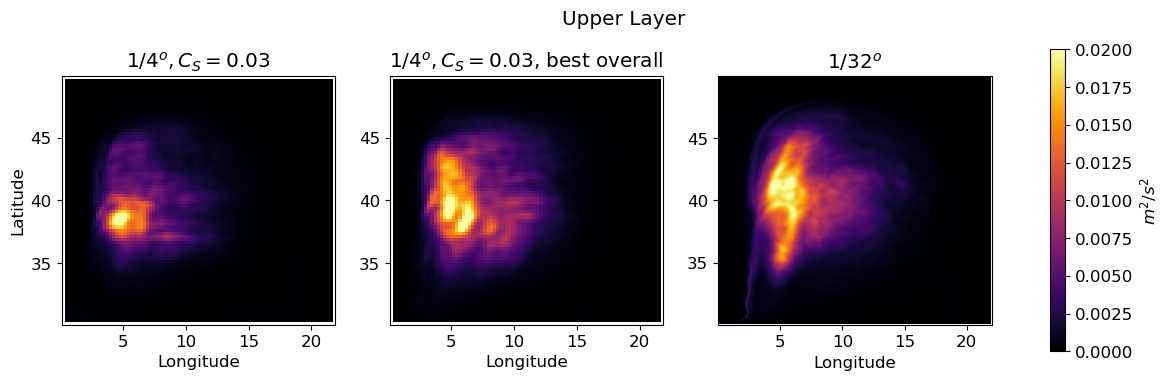

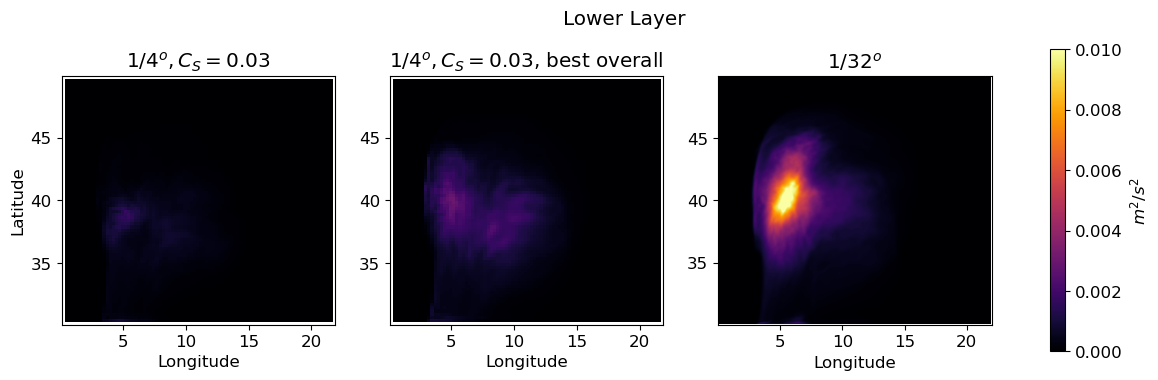

In [388]:
DS.plot_EKE(('Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'), 
                                    names=['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall','$1/32^o$'], zl=0, vmax=0.02)
plt.suptitle('Upper Layer')
DS.plot_EKE(('Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Feb2022/bare/R32'), 
                                    names=['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall','$1/32^o$'], zl=1, vmax=0.01)
plt.suptitle('Lower Layer')

# Animation

In [2]:
exps =  ['Apr2022/R4/EXP3', 'Apr2022/R4/EXP205', 'Apr2022/R4/EXP18', 'Apr2022/R4/EXP38', 'Feb2022/bare/R32']
ds =  dataset_experiments('/scratch/pp2681/mom6/', exps, ['$1/4^o, C_S=0.03$', '$1/4^o, C_S=0.03$, best overall', '$1/4^o, C_S=0.01, \gamma=8/24$', '$1/4^o, C_S=0.03, \gamma=8/24$', '$1/32^o$'])

In [10]:
video_name, fig = ds.plot_relative_vorticity_animation([exps[i] for i in [0,1,4]], timeover=242,zl=1)
Video(video_name,width=1000)

In [12]:
video_name, fig = ds.plot_relative_vorticity_animation([exps[i] for i in [2,3,4]], timeover=242,zl=1)
Video(video_name,width=1000)

In [96]:
video_name, fig = ds.plot_KE_animation([exps[i] for i in [0,1,4]], timeover=242,zl=1,vmax=0.01)
Video(video_name,width=1000)

vmax= 8.258831913735777e-06
max(abs)= 1.327779591520084e-05
vmax= 1.0614643288136003e-05
max(abs)= 1.57834238052601e-05
vmax= 1.3951450084277895e-05
max(abs)= 2.1421305063995533e-05
vmax= 0.05098448237031698
max(abs)= 0.07532807439565659
vmax= 0.012674241349101325
max(abs)= 0.02986004948616028
vmax= 0.022535709412768484
max(abs)= 0.04388823360204697
vmax= 2.2120059038570615e-06
max(abs)= 3.6131164051766973e-06
vmax= 2.554611814048258e-06
max(abs)= 3.817825927399099e-06
vmax= 3.1655070088163484e-06
max(abs)= 5.772584245278267e-06
vmax= 0.041429233986884355
max(abs)= 0.0654185563325882
vmax= 0.009409286662936315
max(abs)= 0.017276586964726448
vmax= 0.01647685421258211
max(abs)= 0.026524323970079422


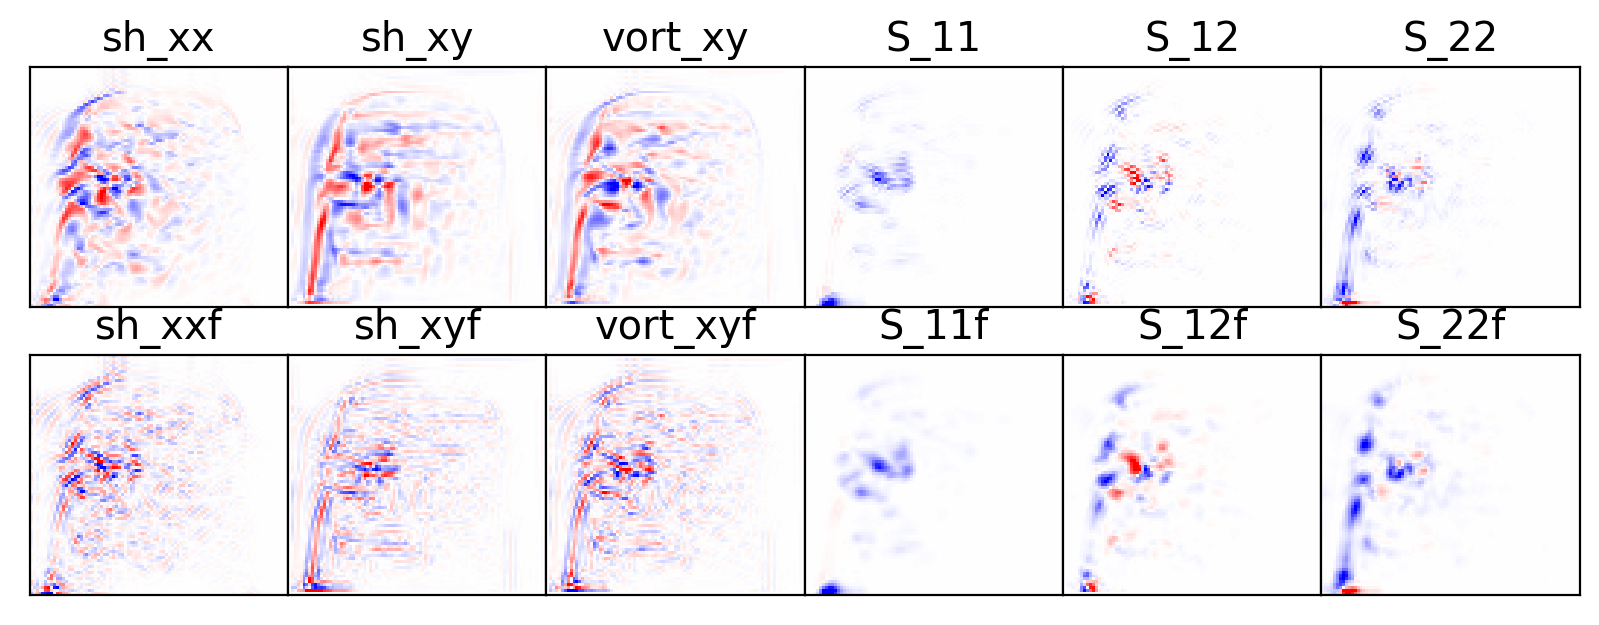

In [173]:
matplotlib.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2,6, figsize=(10,3.5), gridspec_kw={'wspace': 0, 'hspace': 0.2})
axs = axs.reshape(-1)
for j, key in enumerate(['sh_xx', 'sh_xy', 'vort_xy', 'S_11', 'S_12', 'S_22','sh_xxf', 'sh_xyf', 'vort_xyf', 'S_11f', 'S_12f', 'S_22f']):
    field = ds['Apr2022/R4/EXP205'].mom[key].isel(Time=-1,zl=0)
    vmax = float(np.percentile(np.nan_to_num(field),99.9))
    vmin = float(np.percentile(np.nan_to_num(field),0.1))
    vmax = max(abs(vmin), abs(vmax))
    
    field.plot(ax=axs[j], add_colorbar=False, vmin=-vmax, vmax=vmax, cmap=cm.bwr)
    axs[j].set_xlabel('')
    axs[j].set_ylabel('')
    axs[j].set_title(key)
    axs[j].set_xticks([])
    axs[j].set_yticks([])
fig.savefig('Filtering.png',dpi=200)